In [18]:
# Import dependencies
import pandas as pd 
import matplotlib.pyplot as plt 
from pathlib import Path
import sqlalchemy
from sqlalchemy import create_engine, text
from decouple import config
import psycopg2
from dotenv import load_dotenv
import os



In [19]:
# Load environment variables from .env file

load_dotenv()

# Access the environment variables
db_host = os.getenv("DB_HOST")
db_port = os.getenv("DB_PORT")
db_name = os.getenv("DB_NAME")
db_user = os.getenv("DB_USER")
db_password = os.getenv("DB_PASSWORD")

#### Connect to postgres database

In [20]:
# Read database credentials from environment variables

db_host = config('DB_HOST')
db_port = config('DB_PORT')
db_name = config('DB_NAME')
db_user = config('DB_USER')
db_password = config('DB_PASSWORD')

In [24]:
# Connection string
conn_str = f"postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}"

# Create an SQLAlchemy engine
engine = create_engine(conn_str)

# Example query using Pandas
query1 = "SELECT * FROM employees"
query2 = "SELECT * FROM departments"
query3 = "SELECT * FROM titles"
query4 = "SELECT * FROM dept_manager"
query5 = "SELECT * FROM dept_emp"
query6 = "SELECT * FROM salaries"

# Create dataframe
employees_df = pd.read_sql_query(query1, engine)
departments_df = pd.read_sql_query(query2, engine)
titles_df = pd.read_sql_query(query3, engine)
dept_manager_df = pd.read_sql_query(query4, engine)
dept_emp_df = pd.read_sql_query(query5, engine)
salaries_df = pd.read_sql_query(query6, engine)


In [40]:
# count male and female employees

employees_df.head()
male_female_employees = employees_df["sex"].value_counts()
male_female_employees

sex
M    179973
F    120051
Name: count, dtype: int64

In [47]:
emp_df = pd.merge(dept_emp_df,salaries_df, on = "emp_no")
emp_dept_df = pd.merge(emp_df,departments_df, on = "dept_no")

emp_dept_df

,emp_no,dept_no,salary,dept_name
0,10001,d005,60117,Development
1,10006,d005,40000,Development
2,10008,d005,46671,Development
3,10012,d005,40000,Development
4,10014,d005,46168,Development
...,...,...,...,...
331598,499950,d002,54788,Finance
331599,499975,d002,40000,Finance
331600,499977,d002,70216,Finance
331601,499989,d002,64183,Finance


In [56]:
dept_df = emp_dept_df["dept_name"].value_counts().reset_index()
dept_df

,dept_name,count
0,Development,85707
1,Production,73485
2,Sales,52245
3,Customer Service,23580
4,Research,21126
5,Marketing,20211
6,Quality Management,20117
7,Human Resources,17786
8,Finance,17346


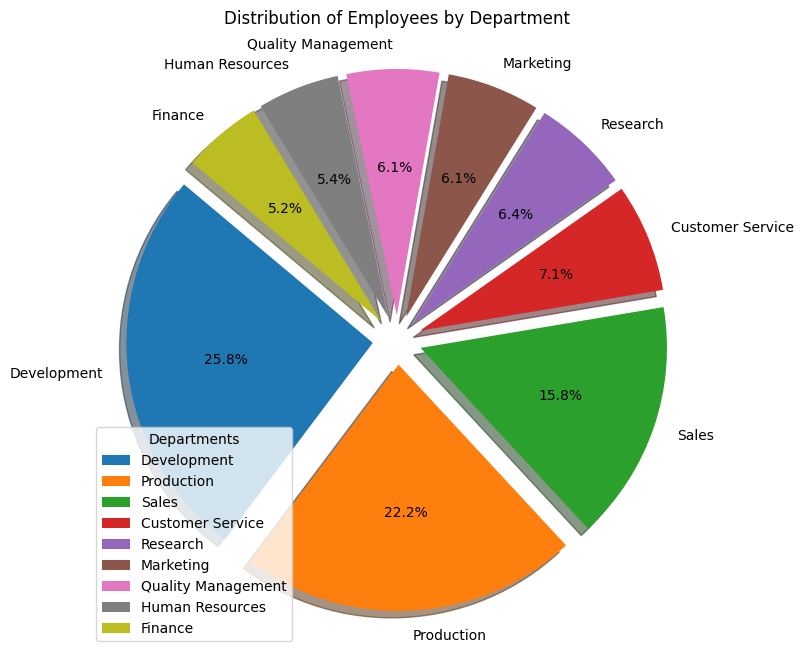

In [67]:
# Create a pie chart to show total employees work for each department

labels = dept_df["dept_name"]
sizes = dept_df["count"]
explode = (0.1, ) * len(sizes)

plt.figure(figsize = (10,8))
plt.pie(sizes, labels = labels, autopct = "%1.1f%%", shadow = True, explode = explode, startangle=140)
plt.title("Distribution of Employees by Department")
plt.legend(labels, title = "Departments", loc = "lower left")

plt.show()

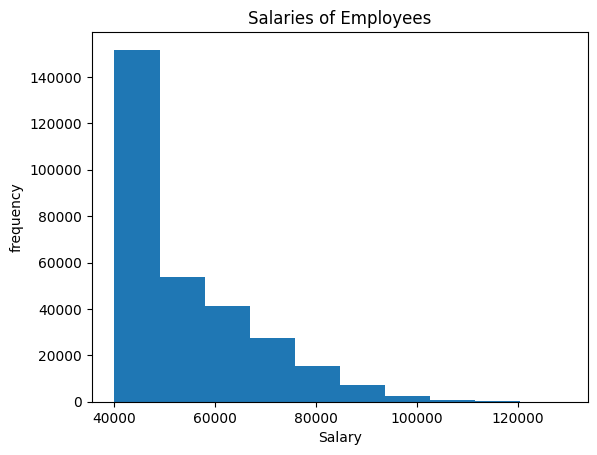

In [71]:
# Create histogram for salaries
plt.hist(salaries_df["salary"])
plt.title("Salaries of Employees")
plt.xlabel("Salary")
plt.ylabel("frequency")
plt.show()

In [74]:
# Find average salary for the employee

avg_salary = salaries_df["salary"].mean()
print(f"Average Salary of an employee: {avg_salary}")

Average Salary of an employee: 52970.732451403885


In [87]:
avg_dept_salary_df = emp_dept_df.groupby(["dept_name"])["salary"].mean().reset_index()
avg_dept_salary_df

,dept_name,salary
0,Customer Service,47998.670441
1,Development,48697.334663
2,Finance,59533.516546
3,Human Resources,44678.646801
4,Marketing,61095.897383
5,Production,48760.450827
6,Quality Management,46456.005717
7,Research,48850.189719
8,Sales,69832.127151


Text(0, 0.5, 'Average Salary')

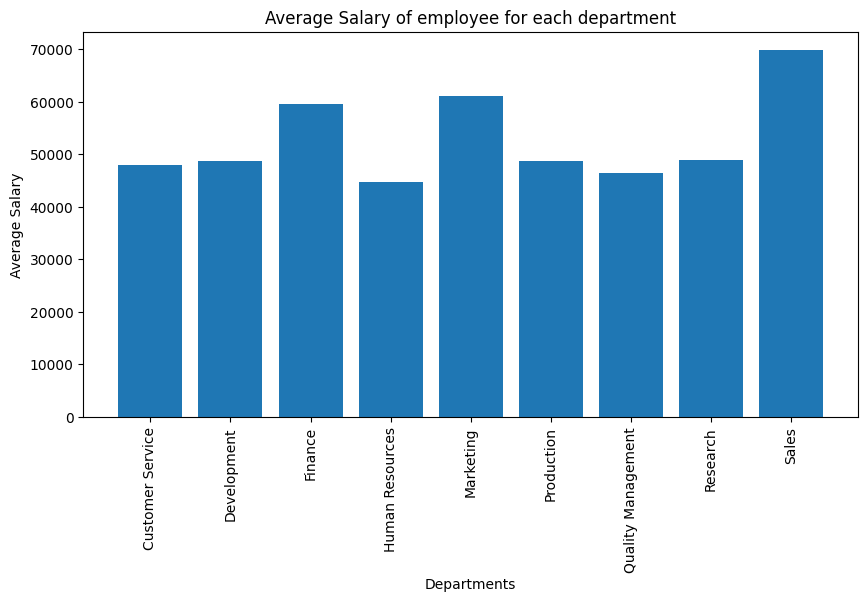

In [94]:
plt.figure(figsize = (10,5))
plt.bar(avg_dept_salary_df["dept_name"], avg_dept_salary_df["salary"])
plt.title("Average Salary of employee for each department")
plt.xticks(rotation = 90)
plt.xlabel("Departments")
plt.ylabel("Average Salary")